# Sin(x) with LSTM-VAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
py_file_location = ".."
sys.path.append(os.path.abspath(py_file_location))

from fints_generation.models import RealNVP

def set_seed_anywhere(seed):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

set_seed_anywhere(seed=42)

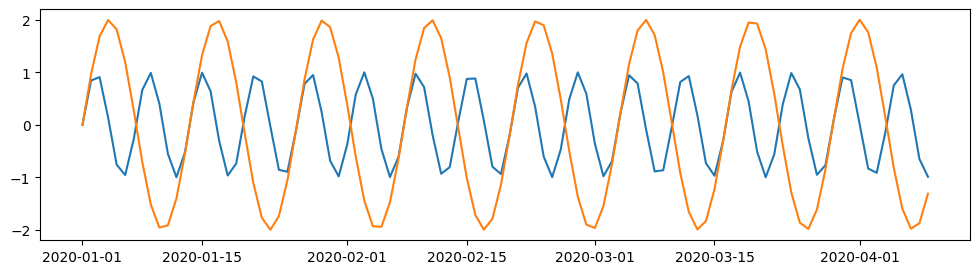

In [2]:
N = 1000
data = pd.DataFrame({
    'X1': np.sin(np.linspace(0, N/1, N)),
    'X2': np.sin(np.linspace(0, N/2, N))*2,
}, index=pd.date_range('2020-01-01', periods=N, freq='D'))

plt.figure(figsize=(12, 3))
plt.plot(data.iloc[:100]);

In [3]:
set_seed_anywhere(seed=42)
model = RealNVP(
    input_dim=2,
    hidden_dim=16,
    n_blocks=2,
    n_hidden=2,
    window_size=20,
    batch_size=16,
    num_epochs=30,
    verbose=True,
    lr=0.001,
)
model.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | flow | ModuleList | 1.4 K 
------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [4]:
fakes = model.sample(data.index, n_samples=10)
fakes[0].head()

,X1,X2
2020-01-01,-0.671940,-0.969450
2020-01-02,-0.210635,-1.068235
2020-01-03,0.498144,1.097566
2020-01-04,-0.841641,-4.380781
2020-01-05,-0.768523,-0.831616


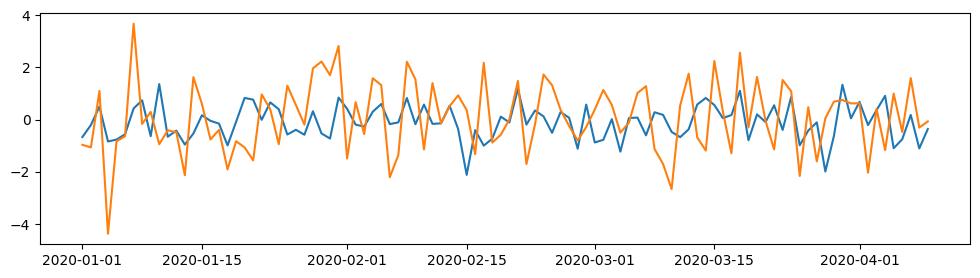

In [5]:
plt.figure(figsize=(12, 3))
plt.plot(fakes[0].iloc[:100]);